# 공공데이터(공공자전거)를 이용한 정형 데이터 관리 (pandas)
- [서울시공공데이터_서울특별시 공공자전거 이용정보(시간대별)](http://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do)

## <작업사항>
- 데이터셋: 서울시 공공데이터 -> 서울특별시 공공자전거 이용정보(시간대별)_2021년.zip
- `pandas`를 이용한 데이터 관리 복습 
- 데이터 전체 상황 파악
- 데이터 전처리 진행
- 시각화 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import platform 

# 차트 한글 처리 
from matplotlib import font_manager, rc
# 윈도우
#font_name = font_manager.FontProperties(fname="").get_name()
#rc('font', family=font_name)

#맥 
rc('font', family='AppleGothic')

# '-'기호 깨짐 방지 
plt.rcParams['axes.unicode_minus'] = False


### 1. 데이터 불러오기
1. 메모리 사용중인 변수 모두 제거
2. '서울특별시 공공자전거 이용정보(시간대별)_21.01.csv' 자료만 읽어오기
3. 데이터 정보 확인 (행,열 갯수/ 데이터 타입) 
4. 폴더 전체 데이터 가져와 하나의 데이터로 병합

In [9]:
# 메모리에 있는 데이터 확인 
print(globals())

# 결과
# 딕셔너리 구조
# '__name__': '__main__', 이런 데이터 제거?

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'import pandas as pd\nfrom matplotlib.plotpy as plt', 'import pandas as pd\nimport matplotlib.plotpy as plt', 'import pandas as pd\nimport matplotlib.pyplot as plt', 'import pandas as pd\nimport matplotlib.pyplot as plt\nimport platform \n\n# 차트 한글 처리 \nfrom matplotlib import font_manager.rc', 'import pandas as pd\nimport matplotlib.pyplot as plt\nimport platform \n\n# 차트 한글 처리 \nfrom matplotlib import font_manager, rc', 'import pandas as pd\nimport matplotlib.pyplot as plt\nimport platform \n\n# 차트 한글 처리 \nfrom matplotlib import font_manager, rc\n# 윈도우\n#font_name = font_manager.FontProperties(fname="").get_name()\n#rc(\'font\', family=font_name)\n\n#맥 \nrc(\'font\', family=\'AppleGothic\')\n\n# \'-\'기호 깨짐 방지 \nplt.rcpa

In [17]:
## 1-1) 메모리 사용중인 변수 모두 제거

#for val in list(globals()):
#    if val != '_':
#        print(globals()[val]) # globals()의 데이터중 [val]에 해당하는 값

val_all = [val for val in list(globals()) if val != '_']
for val in val_all:
    del globals()[val]

In [18]:
print(globals())

{'_': {...}, 'val_all': ['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '__', '___', '_i', '_ii', '_iii', '_i1', '_i2', 'pd', '_i3', 'plt', '_i4', '_i5', 'platform', 'font_manager', 'rc', '_i6', '_i7', '_i8', '_8', '_i9', '_i10', 'val', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17'], 'val': '_i17', '_i': "#for val in list(globals()):\n#    if val != '_':\n#        print(globals()[val]) # globals()의 데이터중 [val]에 해당하는 값\n\nval_all = [val for val in list(globals()) if val != '_']\nfor val in val_all:\n    del globals()[val]", '_ii': "for val in list(globals()):\n    if val != '_':\n        print(globals()[val])", '_iii': "for val in list(globals()):\n    if val != '_':\n        print(val)", '_i18': 'print(globals())', '__builtins__': {'__name__': 'builtins', '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis 

In [25]:
## 1-2) 공공자전거 이용정보 2021년 1월 데이터 가져오기 
import pandas as pd

file_path = './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.01.csv' 
df1 = pd.read_csv(file_path, encoding = 'cp949')

## 1-3) 데이터 정보 확인 (행,열 갯수/ 데이터 타입)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     718857 non-null  object 
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 65.8+ MB


In [83]:
## 1-4) 폴더 전체 데이터 가져와 하나의 데이터로 병합

# 파일 리스트 형태로 뽑을 때 사용 
#from glob import glob  # glob()
import glob             # glob.glob()
# 

#from os.path import isdir

dirpath =   './seoul_data/'
# ?: 한글자/*: 전체 / **: 하위폴더까지 포함 
# '자전거'가 포함되어있으면서 .csv로 끝나는 모든 파일 
#files = glob.glob(dirpath + "*자전거*.csv") 
files = glob.glob(dirpath + "*_21.??.csv") 
print(files)

['./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.01.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.02.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.03.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.07.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.12.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.06.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.10.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.04.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.05.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.11.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.08.csv', './seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.09.csv']


In [84]:
df_seoul = pd.DataFrame()


for file in files:
    try:
        df = pd.read_csv(file, encoding = 'utf-8')
        
    except:
        print(file)
        df = pd.read_csv(file, encoding = 'cp949')
    
    df_seoul = pd.concat([df_seoul, df])
    
df_seoul.reset_index(drop=True, inplace=True) # 인덱스 없애기 ,바로 적용 
df_seoul.info()

./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.01.csv


/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_1625/1230396807.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding = 'utf-8')


./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.07.csv
./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.12.csv
./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.06.csv
./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.10.csv
./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.04.csv
./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.05.csv
./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.11.csv
./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.08.csv
./seoul_data/서울특별시 공공자전거 이용정보(시간대별)_21.09.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25421814 entries, 0 to 25421813
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    object 
 8   운동량 

In [85]:
display(df_seoul.head())

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13.0
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10.0
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7.0
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14.0
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5.0


In [68]:
df_seoul.to_csv('./seoul_data/df_seoul_bike_2021', index=False)
print('====== end ======')

====== end ======


#### 서울시 자전거 대여소 정보 가져오기 
- 위와 다른 파일 
- 파일명: "공공자전거 대여소 정보(21.12월 기준).csv"

In [86]:
##

file_path = "seoul_data/"
seoul_bike = pd.read_csv(file_path + "공공자전거 대여소 정보(21.12월 기준).csv", 
                         encoding='cp949',
                        header = 4) # 4번째 데이터부터 불러옴

# 앞쪽 6개 열만 가져오기
seoul_bike = seoul_bike.iloc[:,:6 ] 

# 열 이름바꾸기
seoul_bike.columns = ['대여소번호', '대여소명', '자치구','상세주소','위도', '경도']

display(seoul_bike.head())

,대여소번호,대여소명,자치구,상세주소,위도,경도
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826


In [87]:
## 
display(df_seoul.tail())

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
25421809,2021-09-30,23,4674,4674. 녹번역e편한세상 캐슬 정문 앞,정기권,M,60대,1,39.60,0.29,1250.00,6.0
25421810,2021-09-30,23,234,234. 영등포구민체육센터 앞,정기권,M,60대,1,18.53,0.17,720.00,6.0
25421811,2021-09-30,23,138,138. 신촌동 제1공영주차장 앞,정기권,M,60대,1,27.53,0.25,1069.46,11.0
25421812,2021-09-30,23,1348,1348. 성북제일새마을금고 본점 앞,정기권,M,70대~,1,0.00,0.00,0.00,3.0
25421813,2021-09-30,23,3787,3787. 가양나들목,정기권,M,70대~,1,122.30,1.19,5147.11,103.0


In [88]:
print(df_seoul.isna().sum())

# -> 성별 NaN값 너무 많아 
# -> '대여일자' '대여시간' '대여소번호 ' '이용건수' '이동거리' 만 뽑아보기

대여일자             0
대여시간             0
대여소번호            0
대여소명             0
대여구분코드          12
성별        10764125
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리            14
사용시간            76
dtype: int64


In [90]:
df_seoul_1 = df_seoul[['대여일자', '대여시간', '대여소번호', '이용건수', '연령대코드']]
df_seoul_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25421814 entries, 0 to 25421813
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   대여일자    object
 1   대여시간    int64 
 2   대여소번호   int64 
 3   이용건수    object
 4   연령대코드   object
dtypes: int64(2), object(3)
memory usage: 969.8+ MB


In [94]:
## 이용건수 데이터 타입 변경하기
print(df_seoul_1.dtypes)
df_seoul_1.astype({'이용건수':int})

# -> 에러) ValueError: invalid literal for int() with base 10: '0.00'

대여일자     object
대여시간      int64
대여소번호     int64
이용건수     object
연령대코드    object
dtype: object


ValueError: invalid literal for int() with base 10: '0.00'

In [95]:
# '이용건수'에 대한 고유값
print(df_seoul_1['이용건수'].unique())

# -> 데이터에 문자, 소수 섞여있어 

[2 1 3 5 4 6 7 8 12 10 11 9 14 13 '1' '2' '4' '3' '5' '6' '0.00' '11.45'
 '128.54' '31.13' '\\N' 97.63 0.64 1.32 52.87 166.28 61.09 36.8 76.82
 21.07 0.12 10.25 69.27 32.97 15.0 48.34 24.97 21.0 20.77 31.24 184.38 17
 16 20 25 22 80.39 0.0 40.49 9.9 168.37 13.24 31.63 48.31 19.0 287.06 0.44
 61.64 154.06 110.05 0.19 0.23 862.18 161.44 0.25 0.5 13.29 103.25 279.13
 29.87 2.07 44.53 210.09 673.01 32.67 42.08 116.13 23.12 0.58 81.38 0.26
 210.78 0.92 47.65 65.72 173.67 38.51 503.1 25.83 54.85 92.24 386.83
 154.18 34.88 18.0 225.21 62.93 45.85 24 28 23 29]


In [96]:
df_seoul_1.astype({'이용건수':float})

# 에러) ValueError: could not convert string to float: '\\N'

ValueError: could not convert string to float: '\\N'

In [98]:
display(df_seoul_1[df_seoul_1['이용건수'] == "\\N"])

,대여일자,대여시간,대여소번호,이용건수,연령대코드
777567,2021-02-02,18,314,\N,1


In [99]:
print(df_seoul_1['연령대코드'].unique())

#-> '연령대코드'도 데이터 섞여있어
#-> 뭔가 하나씩 밀린 것 같은 느낌 

['~10대' '20대' '30대' '40대' '50대' '60대' '70대~' '50??,1"' '1' '20??,1"'
 '62.65' '146.58' '12.43' '0.00' '30??,1"' '60??,1"' '55.93' '2' '26.16'
 '25.17' '40??,1"' '27.28' '63.53' '30??,2"' '317.59' '63.96' '27.30'
 '102.45' '20??,2"' '3' '21.20']


In [111]:
# df_seoul_1 -'이용건수' 값이 '\\N'인 데이터의 '이용건수'의 값을 1로 바꾸기 
df_seoul_1[df_seoul_1['이용건수'] == "\\N"]['이용건수'] = 1


SyntaxError: invalid syntax (1792461156.py, line 3)

In [112]:
# 인덱스를 이용해 행 삭제 - 불필요한 열(777567)
df_seoul_1 = df_seoul_1.drop(777567) 

In [114]:
# '이용건수' 데이터 타입 변경 - float
df_seoul_1 = df_seoul_1.astype({'이용건수':float})
print(df_seoul_1.dtypes)

대여일자      object
대여시간       int64
대여소번호      int64
이용건수     float64
연령대코드     object
dtype: object


### 대여시간대별 대여 건수


In [115]:
### 대여시간별 대여 건수

# '대여시간'-'이용건수'에 대한 합계 
dfs_group = df_seoul_1.groupby("대여시간")[['이용건수']].sum()
display(dfs_group)

,이용건수
대여시간,
0,525190.00
1,339675.00
2,218749.73
3,147721.00
4,122552.00
5,201862.55
6,443855.25
7,1085973.95
8,1797675.19


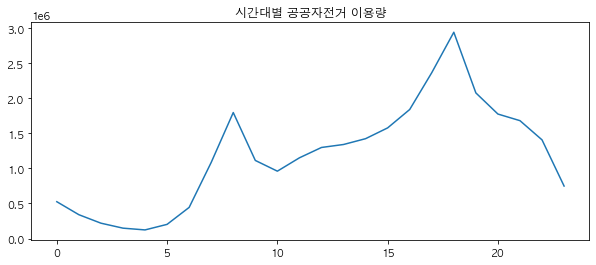

In [117]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

plt.figure(figsize=(10,4))
plt.title('시간대별 공공자전거 이용량')
plt.plot(dfs_group.index, dfs_group.이용건수)    # 꺾은선 


plt.show() 

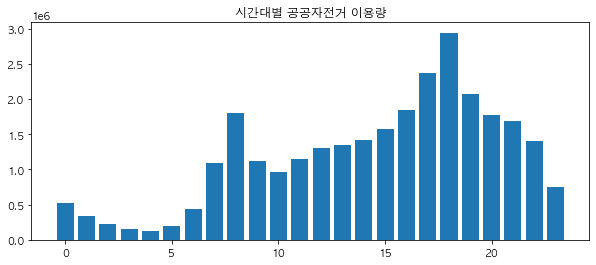

In [118]:
plt.figure(figsize=(10,4))
plt.title('시간대별 공공자전거 이용량')
plt.bar(dfs_group.index, dfs_group.이용건수)    # 바 


plt.show()

### 시간대별 대여소번호별 이용량 분석

In [119]:
# '대여시간'&'이용건수' - '이용건수' 에 대한 합계 
dfs_group_2 = df_seoul_1.groupby(["대여소번호", "대여시간"])[['이용건수']].sum()
display(dfs_group_2)

이용건수
대여소번호 대여시간      
3     1      7.0
      6      1.0
      7      4.0
      8      2.0
      11     5.0
...          ...
99998 22     1.0
      23     1.0
99999 11    11.0
      13     2.0
      18     1.0

[62948 rows x 1 columns]

In [121]:
dfs_group_2.reset_index(drop=False, inplace=True) # 삭제X, 바로 적용 
display(dfs_group_2)

,대여소번호,대여시간,이용건수
0,3,1,7.0
1,3,6,1.0
2,3,7,4.0
3,3,8,2.0
4,3,11,5.0
...,...,...,...
62943,99998,22,1.0
62944,99998,23,1.0
62945,99999,11,11.0
62946,99999,13,2.0


In [123]:
# dfs_group_2의 '대여소번호' 값이 103인 데이터
display(dfs_group_2[dfs_group_2['대여소번호']==103])

,대여소번호,대여시간,이용건수
89,103,0,707.0
90,103,1,475.0
91,103,2,355.0
92,103,3,228.0
93,103,4,144.0
94,103,5,59.0
95,103,6,135.0
96,103,7,365.0
97,103,8,917.0
98,103,9,967.0


In [129]:
# 참고
# 나중에 해당 '대여소번호' 데이터 중 '대여소명'에 '합정역'이 포함된 데이터만 뽑기
display(seoul_bike[seoul_bike['대여소번호']==103])
display(seoul_bike)
display(seoul_bike['대여소번호'].unique())

,대여소번호,대여소명,자치구,상세주소,위도,경도
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835


,대여소번호,대여소명,자치구,상세주소,위도,경도
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826
...,...,...,...,...,...,...
2581,5070,마곡13단지힐스테이트마스터 후문(1320동 앞),강서구,서울시 강서구 마곡중앙1로 71 마곡13단지힐스테이트마스터 후문 인근,37.556763,126.818695
2582,5072,김포공항입구 교통섬,강서구,공항동 74-5,37.561546,126.807083
2583,5073,우장산역 헤링턴타워 앞,강서구,화곡동 1013-3,37.546619,126.836235
2584,5074,마곡동 주니어마곡점앞,강서구,강서구 마곡동 798-17,37.558235,126.825760


array([ 102,  103,  104, ..., 5073, 5074, 5075])

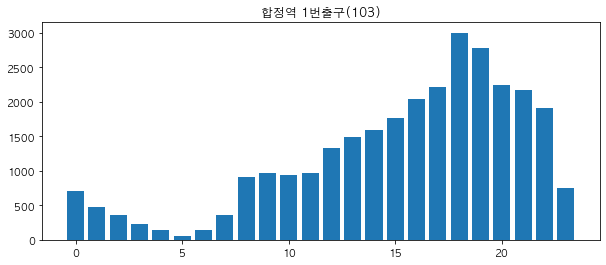

In [130]:
plt_df_2 = dfs_group_2[dfs_group_2['대여소번호']==103]

plt.figure(figsize=(10,4))
plt.title('망원역 2번출구 앞(103) 이용현황')
plt.bar(plt_df_2['대여시간'], plt_df_2.이용건수)    
plt.show()

In [131]:
display(seoul_bike['대여소번호'].unique())

array([ 102,  103,  104, ..., 5073, 5074, 5075])

In [135]:
dfs_group_2_2 = df_seoul_1.groupby(["대여소번호"])[['이용건수']].sum()
dfs_group_2_2 = dfs_group_2_2.reset_index()
display(dfs_group_2_2.head())

,대여소번호,이용건수
0,3,141.0
1,5,83.0
2,10,821.0
3,101,821.0
4,102,36399.0


In [140]:
print(seoul_bike.dtypes)

대여소번호      int64
대여소명      object
자치구       object
상세주소      object
위도       float64
경도       float64
dtype: object


In [144]:
## 대여소 정보와 대요소번호 데이터 merge 진행
# 두 데이터를 대여소번호를 기준으로 열병합(열추가), 대여소번호가 일치하는 값만 진행
seoul_bike_m = pd.merge(seoul_bike, dfs_group_2_2, on='대여소번호')
display(seoul_bike_m)

,대여소번호,대여소명,자치구,상세주소,위도,경도,이용건수
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,36399.0
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,29574.0
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,15480.0
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,12091.0
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,36123.0
...,...,...,...,...,...,...,...
2579,5070,마곡13단지힐스테이트마스터 후문(1320동 앞),강서구,서울시 강서구 마곡중앙1로 71 마곡13단지힐스테이트마스터 후문 인근,37.556763,126.818695,1241.0
2580,5072,김포공항입구 교통섬,강서구,공항동 74-5,37.561546,126.807083,611.0
2581,5073,우장산역 헤링턴타워 앞,강서구,화곡동 1013-3,37.546619,126.836235,277.0
2582,5074,마곡동 주니어마곡점앞,강서구,강서구 마곡동 798-17,37.558235,126.825760,467.0


In [143]:
# how 병합 기준 정의
# 생략: 공동/'outer': 전체 / 'left': 왼족기준 / 'right': 오른족기준
seoul_bike_m_1 = pd.merge(seoul_bike, dfs_group_2_2, 
                         on='대여소번호',how = 'left')
display(seoul_bike_m_1)

,대여소번호,대여소명,자치구,상세주소,위도,경도,이용건수
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,36399.0
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,29574.0
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,15480.0
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,12091.0
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,36123.0
...,...,...,...,...,...,...,...
2581,5070,마곡13단지힐스테이트마스터 후문(1320동 앞),강서구,서울시 강서구 마곡중앙1로 71 마곡13단지힐스테이트마스터 후문 인근,37.556763,126.818695,1241.0
2582,5072,김포공항입구 교통섬,강서구,공항동 74-5,37.561546,126.807083,611.0
2583,5073,우장산역 헤링턴타워 앞,강서구,화곡동 1013-3,37.546619,126.836235,277.0
2584,5074,마곡동 주니어마곡점앞,강서구,강서구 마곡동 798-17,37.558235,126.825760,467.0


### 월별 사용량 분석 